In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# function for give recall,precesion,f1-score,support
from sklearn.metrics import classification_report
from sklearn import metrics

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep = ";")

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(data.shape)
print(list(data))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [5]:
print('Default:\n', data['age'].unique())
print('job:\n', data['job'].unique())
print('Mat:\n', data['marital'].unique())
print('Edu:\n', data['education'].unique())
print('Def:\n', data['default'].unique())


Default:
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Mat:
 ['married' 'single' 'divorced' 'unknown']
Edu:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Def:
 ['no' 'unknown' 'yes']


In [6]:
print('housing:\n', data['housing'].unique())
print('loan:\n', data['loan'].unique())
print('month:\n', data['month'].unique())
print('contact:\n', data['contact'].unique())
print('day_of_week:\n', data['day_of_week'].unique())

housing:
 ['no' 'yes' 'unknown']
loan:
 ['no' 'yes' 'unknown']
month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
contact:
 ['telephone' 'cellular']
day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri']


In [7]:
print('duration:\n', data['duration'].unique())
c = data['duration'].unique()
print(c.shape)

print('pdays:\n', data['pdays'].unique())
print('previous:\n', data['previous'].unique())
print('poutcome:\n', data['poutcome'].unique())


duration:
 [ 261  149  226 ... 1246 1556 1868]
(1544,)
pdays:
 [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous:
 [0 1 2 3 4 5 6 7]
poutcome:
 ['nonexistent' 'failure' 'success']


In [8]:
print('emp.var.rate:\n', data['emp.var.rate'].unique())
print('cons.price.idx:\n', data['cons.price.idx'].unique())
print('cons.conf.idx:\n', data['cons.conf.idx'].unique())
print('euribor3m:\n', data['euribor3m'].unique())

emp.var.rate:
 [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx:
 [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons.conf.idx:
 [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m:
 [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.

In [9]:
print('nr.employed:\n', data['nr.employed'].unique())
print('y:\n', data['y'].unique())

nr.employed:
 [5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]
y:
 ['no' 'yes']


In [10]:
#Converting the Object type to int

labelencoder = LabelEncoder()


data['job']      = labelencoder.fit_transform(data['job']) 
data['marital']  = labelencoder.fit_transform(data['marital']) 
data['education']= labelencoder.fit_transform(data['education']) 
data['default']  = labelencoder.fit_transform(data['default']) 
data['housing']  = labelencoder.fit_transform(data['housing']) 
data['loan']     = labelencoder.fit_transform(data['loan']) 
le_month    =      labelencoder.fit(data['month'])
data['month'] = le_month.transform(data['month'])
data['contact']  = labelencoder.fit_transform(data['contact']) 
data['day_of_week'] = labelencoder.fit_transform(data['day_of_week'])
data['poutcome'] = labelencoder.fit_transform(data['poutcome'])


In [11]:
label = labelencoder.fit_transform(data['y'])

data['y'].value_counts()

#print(data['duration'])

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
#Droping of the age,duration and label for features

##Duration highly affects the output target (e.g., if duration=0 then y='no'). 
##Yet, the duration is not known before a call is performed. 
###Also, after the end of the call y is obviously known. 
###Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

data = data.drop(['age','duration','y' ], axis = 1)

In [13]:
print(label.shape)

(41188,)


In [17]:
#sperating the data in 80:20 ration for traning and testing
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    label, test_size = 0.20,)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(32950, 18)
(32950,)
(8238, 18)
(8238,)


### <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

## Logistic Regression

### >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [18]:
#Bulding the model
model = LogisticRegression() 
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
print("Accuracy: {}".format(model.score(x_test, y_test)))

Accuracy: 0.8988832240835154


In [13]:
#Taking into features into account to understand which feature effect the model most.

import eli5
c = list(data)
eli5.show_weights(model,feature_names=c)

Weight?,Feature
+0.406,cons.price.idx
+0.110,poutcome
+0.094,day_of_week
+0.053,marital
+0.038,cons.conf.idx
+0.022,education
+0.006,job
+0.003,<BIAS>
-0.001,loan
-0.001,pdays


In [40]:
#Taking an example form the data so the features
i = 18
x_test.iloc[[i]]
eli5.show_prediction(model, x_test.iloc[[i]], show_feature_values=True , feature_names=c)

In [41]:
#Checking what is code of the features 

print(x_test.iloc[[i]]['day_of_week'],"\n"
,x_test.iloc[[i]]['pdays'],"\n",x_test.iloc[[i]]['education'])



38726    3
Name: day_of_week, dtype: int64 
 38726    3
Name: pdays, dtype: int64 
 38726    0
Name: education, dtype: int64


In [42]:
#generating the report

label_log = model.predict(x_test)

print(classification_report(y_test, label_log))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7320
           1       0.64      0.21      0.32       918

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



0.7536717085133994


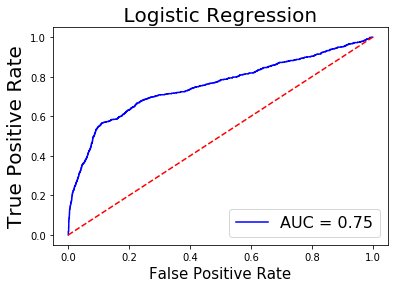

In [43]:


probs = model.predict_proba(x_test)
preds = probs[:,1]

fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)
print(roc_auclog)

plt.plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
plt.plot([0, 1], [0, 1],'r--')
plt.title(' Logistic Regression ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})


### <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

## Random Forest

### >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [19]:
model_rand = RandomForestClassifier(n_estimators = 200)
# Fit the classifier to the training data
model_rand.fit(x_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(model_rand.score(x_test, y_test)))

Accuracy: 0.8860160233066279


In [20]:
label_rand = model_rand.predict(x_test)
print(classification_report(y_test, label_rand))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7279
           1       0.52      0.31      0.39       959

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.72      0.64      0.66      8238
weighted avg       0.87      0.89      0.87      8238



0.7720689640846917


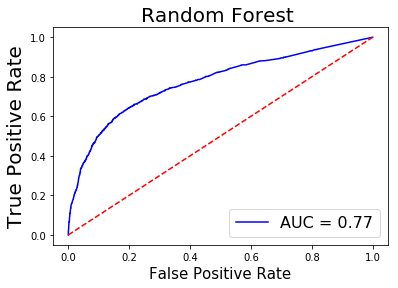

In [22]:
probs_rand = model_rand.predict_proba(x_test)
preds_rand = probs_rand[:,1]

fpr_rand, tpr_rand, threshold_rand = metrics.roc_curve(y_test, preds_rand)
roc_aucrand = metrics.auc(fpr_rand, tpr_rand)
print(roc_aucrand)

plt.plot(fpr_rand, tpr_rand, 'b', label = 'AUC = %0.2f' % roc_aucrand)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Random Forest ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})